In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


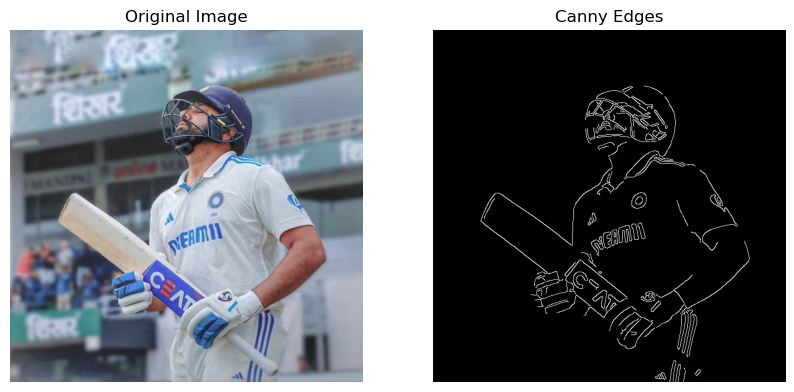

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg") # Replace 'image.jpg' with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

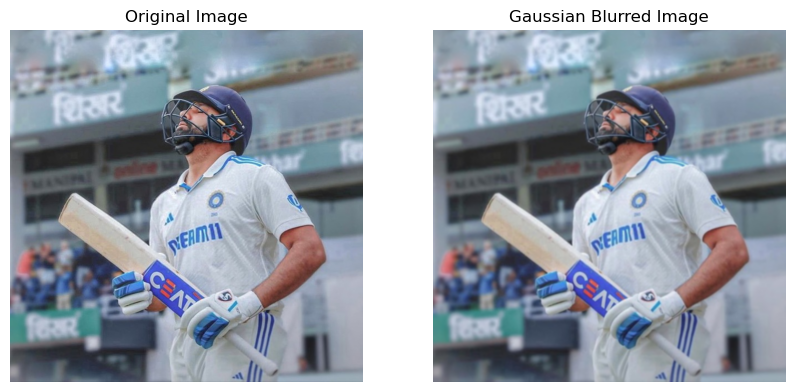

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg")
if image is None:
    print("Error loading image. Please check the path.")

# Convert to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
# Parameters: source image, (kernel width, kernel height), standard deviation (0 means calculated from kernel size)
gaussian_blurred = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(gaussian_blurred)
plt.axis('off')

plt.show()


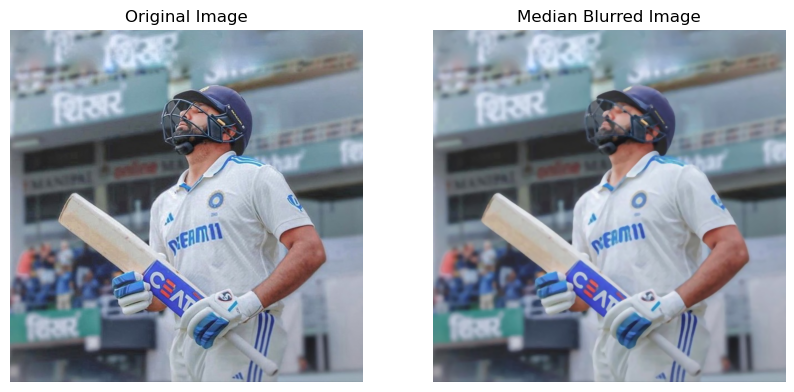

In [9]:
# Apply Median Filter
median_blurred = cv2.medianBlur(image, 5)

# Display the median blurred image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Median Blurred Image')
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [11]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


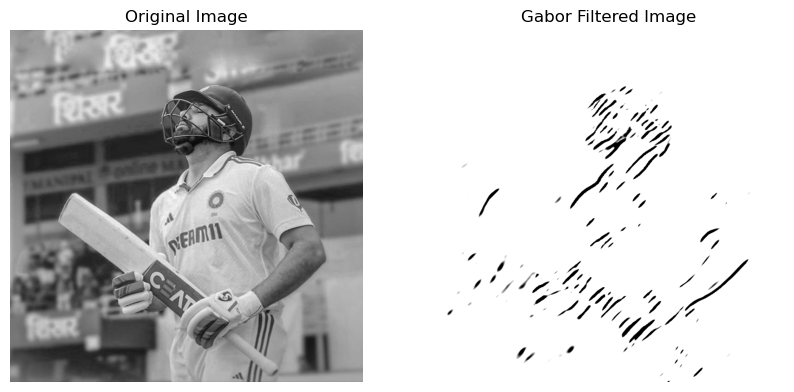

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg")
if image is None:
    print("Error loading image. Please check the path.")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Parameters for the Gabor filter
ksize = 21  # Size of the filter
sigma = 5.0  # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the normal to the parallel stripes of the Gabor function
lamda = 10.0  # Wavelength of the cosine factor
gamma = 0.5  # Spatial aspect ratio
phi = 0  # Phase offset

# Create Gabor filter
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

# Apply Gabor filter
filtered_image = cv2.filter2D(gray_image, cv2.CV_8UC3, gabor_kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gabor Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


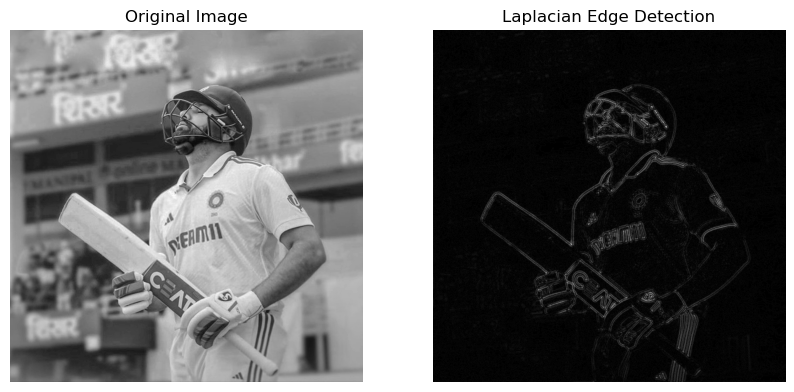

In [15]:
###### import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg")
if image is None:
    print("Error loading image. Please check the path.")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Laplacian edge detection
laplacian_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert back to uint8
laplacian_edges = cv2.convertScaleAbs(laplacian_edges)

# Display the original and Laplacian edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.show()


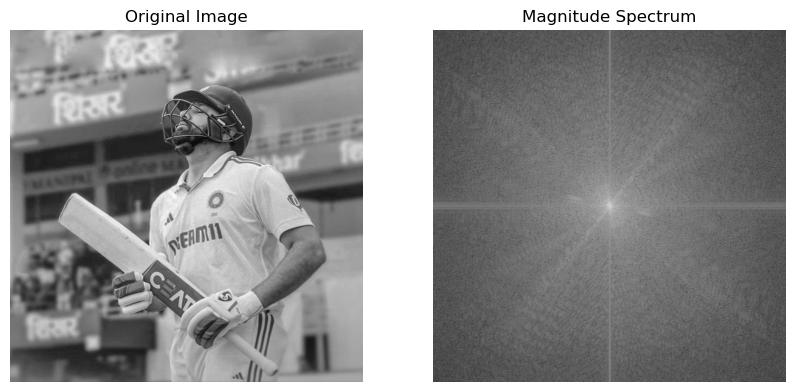

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg")
if image is None:
    print("Error loading image. Please check the path.")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform the 2D Fourier Transform
f = np.fft.fft2(gray_image)
fshift = np.fft.fftshift(f)  # Shift zero frequency component to the center

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fshift)

# Scale the magnitude spectrum for visualization
magnitude_spectrum = np.log(1 + magnitude_spectrum)  # Log scale for better visibility

# Display the original image and magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()


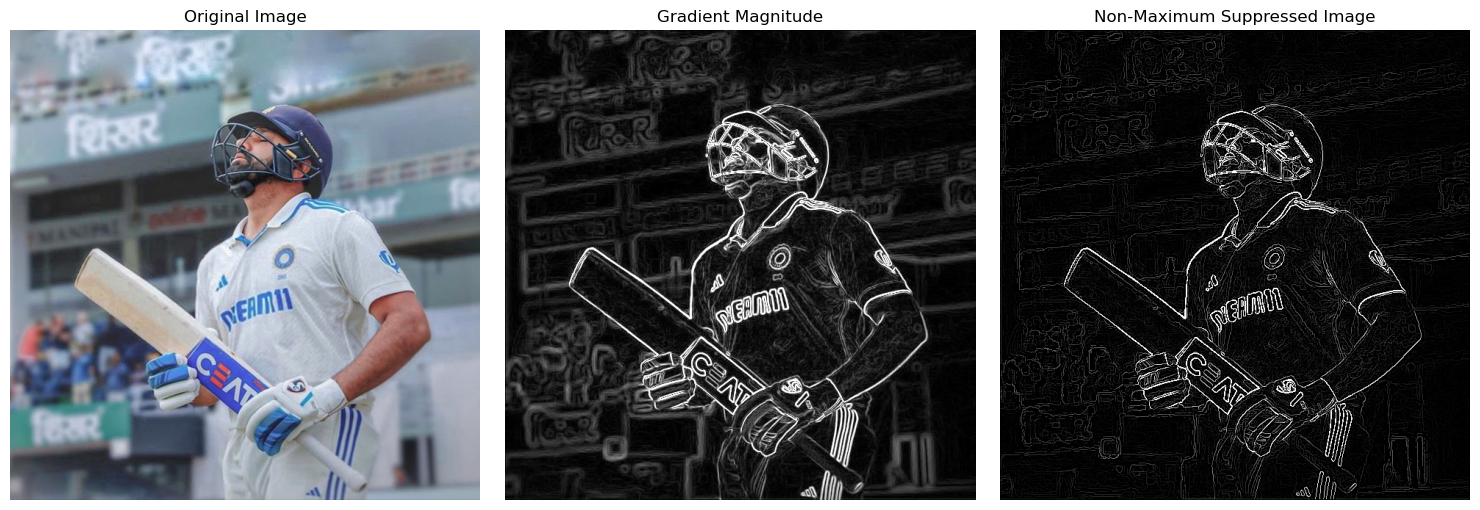

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_maximum_suppression(image, gradient_direction):
    suppressed_image = np.zeros_like(image)

    height, width = image.shape

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            angle = gradient_direction[i, j]
            if angle < 0:
                angle += 180

            if (angle >= 0 and angle < 22.5) or (angle >= 157.5 and angle < 180):
                neighbor1 = image[i, j + 1]
                neighbor2 = image[i, j - 1]
            elif (angle >= 22.5 and angle < 67.5):
                neighbor1 = image[i + 1, j + 1]
                neighbor2 = image[i - 1, j - 1]
            elif (angle >= 67.5 and angle < 112.5):
                neighbor1 = image[i + 1, j]
                neighbor2 = image[i - 1, j]
            else:
                neighbor1 = image[i - 1, j + 1]
                neighbor2 = image[i + 1, j - 1]

            if image[i, j] >= neighbor1 and image[i, j] >= neighbor2:
                suppressed_image[i, j] = image[i, j]

    return suppressed_image

# Load the image
image = cv2.imread(r"C:\Users\anush\Desktop\ro.jpg")
if image is None:
    print("Error loading image. Please check the path.")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator to get gradients
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude using np.hypot
gradient_magnitude = np.hypot(sobel_x, sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Calculate gradient direction
gradient_direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
gradient_direction = (gradient_direction + 180) % 180

# Apply non-maximum suppression
nms_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Non-Maximum Suppressed Image')
plt.imshow(nms_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
